In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('uscovid19.csv')
print(len(df))
df.head()

20780


,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-03-07,AK,305.0,NaN,0,NaN,1293.0,1293.0,33.0,0,...,1731628.0,0,NaN,NaN,NaN,NaN,NaN,0,1731628.0,0
1,2021-03-07,AL,10148.0,7963.0,-1,2185.0,45976.0,45976.0,494.0,0,...,2323788.0,2347,NaN,NaN,119757.0,NaN,2323788.0,2347,NaN,0
2,2021-03-07,AR,5319.0,4308.0,22,1011.0,14926.0,14926.0,335.0,11,...,2736442.0,3380,NaN,NaN,NaN,481311.0,NaN,0,2736442.0,3380
3,2021-03-07,AS,0.0,NaN,0,NaN,NaN,NaN,NaN,0,...,2140.0,0,NaN,NaN,NaN,NaN,NaN,0,2140.0,0
4,2021-03-07,AZ,16328.0,14403.0,5,1925.0,57907.0,57907.0,963.0,44,...,7908105.0,45110,580569.0,NaN,444089.0,NaN,3842945.0,14856,7908105.0,45110


In [19]:
# Filter 
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df20 = df[df['year'] == 2020]


In [22]:
# Sum all data by month and states
df20_sum = df20.groupby(['state', 'month']).sum()
df20_sum = df20_sum.reset_index()
df20_sum.head()

/var/folders/l0/5wj7kl915m57mtw1g8z_zj080000gn/T/ipykernel_98583/2908853018.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df20_sum = df20.groupby(['state', 'month']).sum()


,state,month,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease,year,day
0,AK,3,13.0,0.0,3,0.0,72.0,72.0,0.0,12,...,0.0,0.0,0.0,0.0,0.0,0,25840.0,3713,52520,481
1,AK,4,230.0,0.0,6,0.0,946.0,946.0,386.0,26,...,0.0,0.0,0.0,0.0,0.0,0,303167.0,15406,60600,465
2,AK,5,305.0,287.0,1,0.0,1378.0,1378.0,379.0,12,...,0.0,0.0,0.0,0.0,0.0,0,1068884.0,32576,62620,496
3,AK,6,351.0,351.0,4,0.0,1784.0,1784.0,422.0,18,...,0.0,0.0,0.0,0.0,0.0,0,2388182.0,60490,60600,465
4,AK,7,558.0,558.0,9,0.0,3262.0,3262.0,952.0,83,...,0.0,0.0,0.0,0.0,0.0,0,5118989.0,120921,62620,496


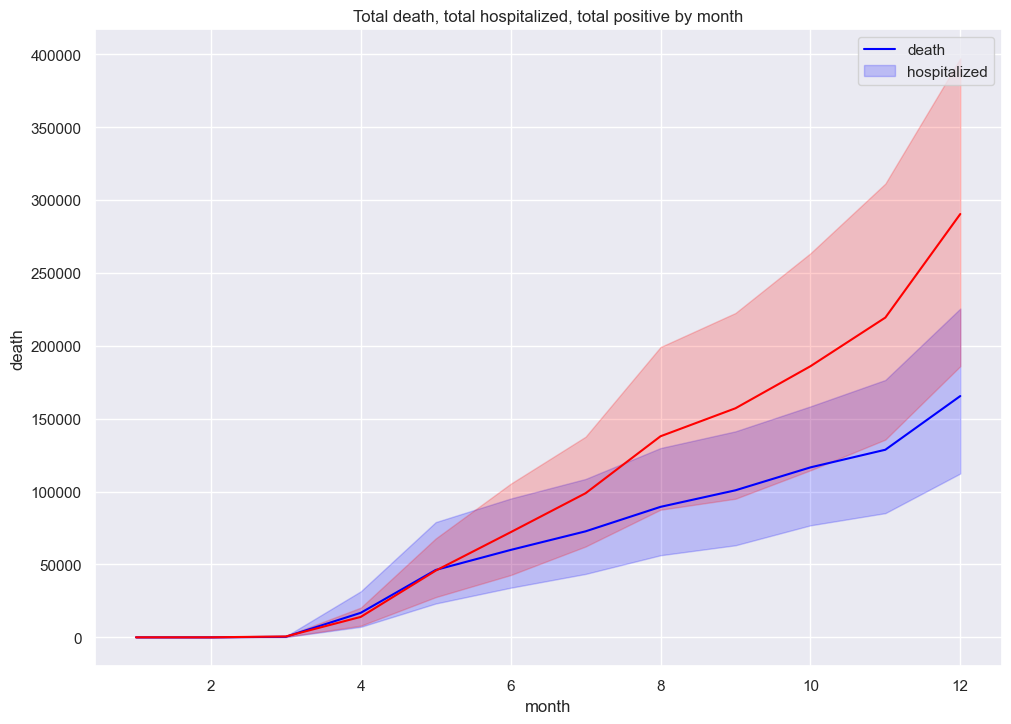

In [34]:
# graph total death, total hospitalized, total positive by month, each on a line graph
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x='month', y='death', data=df20_sum, color='blue')
sns.lineplot(x='month', y='hospitalized', data=df20_sum, color='red')
plt.legend(labels=['death', 'hospitalized'])
plt.title('Total death, total hospitalized, total positive by month')
plt.show()

In [42]:
# create a dict that map state code to state full name
''' 'AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL',
       'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA',
       'MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE',
       'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI',
       'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV',
       'WY']
'''
states = {}
states['AZ'] = 'Arizona'
states['AL'] = 'Alabama'
states['AK'] = 'Alaska'
states['AR'] = 'Arkansas'
states['AS'] = 'American Samoa'
states['CA'] = 'California'
states['CO'] = 'Colorado'
states['CT'] = 'Connecticut'
states['DE'] = 'Delaware'
states['DC'] = 'District of Columbia'
states['FL'] = 'Florida'
states['GA'] = 'Georgia'
states['GU'] = 'Guam' 
states['HI'] = 'Hawaii'
states['ID'] = 'Idaho'
states['IA'] = 'Iowa'
states['IL'] = 'Illinois'
states['IN'] = 'Indiana'
states['KS'] = 'Kansas'
states['KY'] = 'Kentucky'
states['LA'] = 'Louisiana'
states['ME'] = 'Maine'
states['MD'] = 'Maryland'
states['MA'] = 'Massachusetts'
states['MI'] = 'Michigan'
states['MN'] = 'Minnesota'
states['MS'] = 'Mississippi'
states['MO'] = 'Missouri'
states['MP'] = 'Northern Mariana Islands'
states['MT'] = 'Montana'
states['NE'] = 'Nebraska'
states['NV'] = 'Nevada'
states['NH'] = 'New Hampshire'
states['NJ'] = 'New Jersey'
states['NM'] = 'New Mexico'
states['NY'] = 'New York'
states['NC'] = 'North Carolina'
states['ND'] = 'North Dakota'
states['OH'] = 'Ohio'
states['OK'] = 'Oklahoma'
states['OR'] = 'Oregon'
states['PA'] = 'Pennsylvania'
states['PR'] = 'Puerto Rico'
states['RI'] = 'Rhode Island'
states['SC'] = 'South Carolina'
states['SD'] = 'South Dakota'
states['TN'] = 'Tennessee'
states['TX'] = 'Texas'
states['UT'] = 'Utah'
states['VT'] = 'Vermont'
states['VA'] = 'Virginia'
states['VI'] = 'Virgin Islands'
states['WA'] = 'Washington'
states['WV'] = 'West Virginia'
states['WI'] = 'Wisconsin'
states['WY'] = 'Wyoming'
len(states)
# add state full name to df20
df20['state_name'] = df20['state'].map(states)

/var/folders/l0/5wj7kl915m57mtw1g8z_zj080000gn/T/ipykernel_98583/2611739023.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df20['state_name'] = df20['state'].map(states)


In [62]:
# map month number to month name
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_dict = {}
for i in range(1, 13):
    month_dict[i] = month_names[i-1]
df20['month_name'] = df20['month'].map(month_dict)

In [64]:
df20.head(20)

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease,year,month,day,state_name,month_name
20779,2020-01-13,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,NaN,0,NaN,0,2020,1,13,Washington,Jan
20778,2020-01-14,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,NaN,0,NaN,0,2020,1,14,Washington,Jan
20777,2020-01-15,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,NaN,0,NaN,0,2020,1,15,Washington,Jan
20776,2020-01-16,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,NaN,0,NaN,0,2020,1,16,Washington,Jan
20775,2020-01-17,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,NaN,0,NaN,0,2020,1,17,Washington,Jan
20774,2020-01-18,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,NaN,0,NaN,0,2020,1,18,Washington,Jan
20773,2020-01-19,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,NaN,0,NaN,0,2020,1,19,Washington,Jan
20772,2020-01-20,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,NaN,0,NaN,0,2020,1,20,Washington,Jan
20771,2020-01-21,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,NaN,0,NaN,0,2020,1,21,Washington,Jan
20770,2020-01-22,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,NaN,0,NaN,0,2020,1,22,Washington,Jan


In [65]:
# save df20 to csv
df20.to_csv('uscovid19_2020.csv', index=False)

In [44]:
df20['state_name'].unique()

array(['Alaska', 'Alabama', 'Arkansas', 'American Samoa', 'Arizona',
       'California', 'Colorado', 'Connecticut', 'District of Columbia',
       'Delaware', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Iowa',
       'Idaho', 'Illinois', 'Indiana', 'Kansas', 'Kentucky', 'Louisiana',
       'Massachusetts', 'Maryland', 'Maine', 'Michigan', 'Minnesota',
       'Missouri', 'Northern Mariana Islands', 'Mississippi', 'Montana',
       'North Carolina', 'North Dakota', 'Nebraska', 'New Hampshire',
       'New Jersey', 'New Mexico', 'Nevada', 'New York', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Virginia', 'Virgin Islands', 'Vermont',
       'Washington', 'Wisconsin', 'West Virginia', 'Wyoming'],
      dtype=object)

In [59]:
# make the list of all contiental states
contiental_states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

In [60]:
# sort df20 by date
df20 = df20.sort_values(by=['date'])

In [61]:
# loop through all rows, check if the state has more than 1000 death, if yes, add it to a list
# find the date when the state has more than 1000 death
state_list = []
all_states_1000_death_date = ''
for index, row in df20.iterrows():
    if row['death'] > 1 and row['state_name'] not in state_list and row['state_name'] in contiental_states:
        state_list.append(row['state_name'])
        print(row['state_name'])
        print(len(state_list))
        # if state_list is equal to all_states, break
        if len(state_list) == len(contiental_states):
            all_states_1000_death_date = row['date']
            print(all_states_1000_death_date)
            print(len(state_list))
            break

Washington
1
Florida
2
California
3
New Jersey
4
New York
5
Louisiana
6
Maryland
7
Michigan
8
Indiana
9
Colorado
10
Nevada
11
Texas
12
Massachusetts
13
Virginia
14
Oregon
15
Illinois
16
Georgia
17
Wisconsin
18
Vermont
19
Connecticut
20
Pennsylvania
21
Ohio
22
Missouri
23
Kansas
24
Kentucky
25
South Carolina
26
Oklahoma
27
Arizona
28
Tennessee
29
District of Columbia
30
Mississippi
31
Arkansas
32
Delaware
33
North Carolina
34
Minnesota
35
Utah
36
New Hampshire
37
Idaho
38
Iowa
39
Alabama
40
New Mexico
41
Nebraska
42
Alaska
43
Rhode Island
44
Maine
45
North Dakota
46
Montana
47
South Dakota
48
West Virginia
49
Hawaii
50
Wyoming
51
2020-04-15 00:00:00
51


In [73]:
# convert df20 to sum by state and month 
df20_sum = df20.groupby(['state_name', 'month']).sum()
df20_sum = df20_sum.reset_index()
# map month number to month name
df20_sum['month_name'] = df20_sum['month'].map(month_dict)
# only keep state_name, month_name, death, hospitalized, positive
df20_sum = df20_sum[['state_name', 'month_name', 'death', 'hospitalized', 'positive']]
df20_sum.head()

/var/folders/l0/5wj7kl915m57mtw1g8z_zj080000gn/T/ipykernel_98583/260588950.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df20_sum = df20.groupby(['state_name', 'month']).sum()


,state_name,month_name,death,hospitalized,positive
0,Alabama,Mar,30.0,0.0,5640.0
1,Alabama,Apr,3936.0,15687.0,122902.0
2,Alabama,May,14341.0,43520.0,367602.0
3,Alabama,Jun,23695.0,68997.0,799987.0
4,Alabama,Jul,38436.0,206707.0,1918336.0


In [74]:
# save df20_sum to csv
df20_sum.to_csv('uscovid19_2020_sum.csv', index=False)

In [72]:
# find max hospitalized number
df20_sum[df20_sum['positive'] == df20_sum['positive'].max()]['positive']

59    52714119.0
Name: positive, dtype: float64

In [70]:
df20_sum.columns

Index(['state_name', 'month', 'death', 'deathConfirmed', 'deathIncrease',
       'deathProbable', 'hospitalized', 'hospitalizedCumulative',
       'hospitalizedCurrently', 'hospitalizedIncrease', 'inIcuCumulative',
       'inIcuCurrently', 'negative', 'negativeIncrease',
       'negativeTestsAntibody', 'negativeTestsPeopleAntibody',
       'negativeTestsViral', 'onVentilatorCumulative', 'onVentilatorCurrently',
       'positive', 'positiveCasesViral', 'positiveIncrease', 'positiveScore',
       'positiveTestsAntibody', 'positiveTestsAntigen',
       'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen',
       'positiveTestsViral', 'recovered', 'totalTestEncountersViral',
       'totalTestEncountersViralIncrease', 'totalTestResults',
       'totalTestResultsIncrease', 'totalTestsAntibody', 'totalTestsAntigen',
       'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'totalTestsPeopleViral', 'totalTestsPeopleViralIncrease',
       'totalTestsViral', 'totalTestsViralInc